# ANÁLISE DO MERCADO DE VINHOS: EXPLORANDO TENDÊNCIAS E PADRÕES

![Texto Alternativo](./img-vinho.png)

## INTRODUÇÃO
---

A análise do mercado de vinhos é uma jornada fascinante, repleta de nuances e descobertas. Neste estudo, mergulharemos nesse universo rico e complexo para responder a algumas perguntas essenciais.

Antes de tudo, é importante lembrar que cada garrafa de vinho conta uma história única, refletindo não apenas o trabalho dos produtores, mas também a tradição enológica de sua região. Portanto, ao explorarmos os dados, estamos desvendando muito mais do que números; estamos explorando uma herança cultural e histórica.

Ao analisarmos os dados sobre vinhos, nos deparamos com questões intrigantes: 

- **De onde vem o melhor vinho?**
- **O preço do vinho está relacionado com a qualidade?**
- **Certas variedades de uvas são de maior qualidade?**
- **Qual é o melhor vinho em cada faixa de preço?**
- **Que palavras são mais utilizadas para descrever um vinho?**

Por meio dessa análise, buscamos não apenas compreender o mercado de vinhos, mas também oferecer insights valiosos para consumidores e produtores. Ao entendermos melhor as tendências e padrões que emergem dos dados, podemos apreciar melhor os vinhos que consumimos e contribuir para o crescimento e aprimoramento da indústria vinícola.

Os dados utilizados nesta análise podem ser encontrados em [fonte](https://www.kaggle.com/datasets/zynicide/wine-reviews?resource=download).


## VERIFICANDO DADOS
---




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Utilizaremos a biblioteca Seaborn, uma opção de biblioteca para visualização baseada na Matplotlib que fornece uma interface mais simples para plotar os gráficos (escreveremos menos código).

Vamos examinar o dataset:

In [9]:
df = pd.read_csv("./CriticaVinhos.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [97]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

### Vamos elaborar um pequeno sumário para essas colunas e ver o que iremos utilizar em nossa análise:

- **country**: país onde o vinho foi feito (interessante)
- **description**: descrição do vinho
- **designation**: vinhedo dentro da adega de onde as uvas que fizeram o vinho foram coletadas
- **points**: número de pontos que o vinho obteve em sua avaliação (precisamos entender a escala de pontos)
- **price**: preço da garrafa de vinho
- **province**: província (estado) onde o vinho foi feito
- **region_1**: região onde o vinho foi feito
- **region_2**: região mais específica dentro de uma vitícola (podemos remover isso)
- **taster_name**: nome do revisor
- **taster_twitter_handle**: perfil do Twitter do avaliador
- **title**: nome do vinho analisado (o ano de fabricação está no título)
- **variety**: tipo de uvas utilizadas na fabricação do vinho
- **winery**: adega onde o vinho foi feito


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


Ao todo temos 129.971 linhas e 14 colunas no dataset. Existem algumas colunas com dados ausentes e podemos descartar algumas dessas colunas, como por exemplo region_2, taster_name e taster_twitter_handle.

In [12]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


O método `describe()` nos apresenta uma distribuição de pontos para uma garrafa de vinho. Nele, observamos que o valor mínimo é de  80,00 e o valor mais elevado chega a 3.300. Além disso, destacamos que o preço mais baixo encontrado é de $ 4,00.

De acordo com [este site](https://www.wine-searcher.com/critics-17-wine+enthusiast), podemos visualizar a seguinte classificação por pontos:

## Classificação por Pontos de Vinho

- **98-100**: Clássico  
- **94-97**: Soberbo  
- **90-93**: Excelente  
- **87-89**: Muito bom  
- **83-86**: Bom  
- **80-82**: Aceitável  


In [14]:
df["country"].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

 - _Note que a maioria dos vinhos avaliados é dos EUA, França, Itália, Espanha e Portugal._

In [17]:
df["variety"].value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: variety, Length: 707, dtype: int64

## LIMPANDO OS DADOS
---

In [27]:
df1 = df.copy()


In [84]:
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
df1.head()

,country,description,points,price,province,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


In [33]:
print("{:.0%}".format(df1["price"].count() / df1.shape[0]))

93%


In [36]:
df1= df1.dropna(subset=["country", "price", "variety"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             120915 non-null  int64  
 1   country                120915 non-null  object 
 2   description            120915 non-null  object 
 3   designation            86148 non-null   object 
 4   points                 120915 non-null  int64  
 5   price                  120915 non-null  float64
 6   province               120915 non-null  object 
 7   region_1               101400 non-null  object 
 8   region_2               50292 non-null   object 
 9   taster_name            96420 non-null   object 
 10  taster_twitter_handle  91500 non-null   object 
 11  title                  120915 non-null  object 
 12  variety                120915 non-null  object 
 13  winery                 120915 non-null  object 
dtypes: float64(1), int64(2), object(11)


## ANÁLISE EXPLORATÓRIA
---

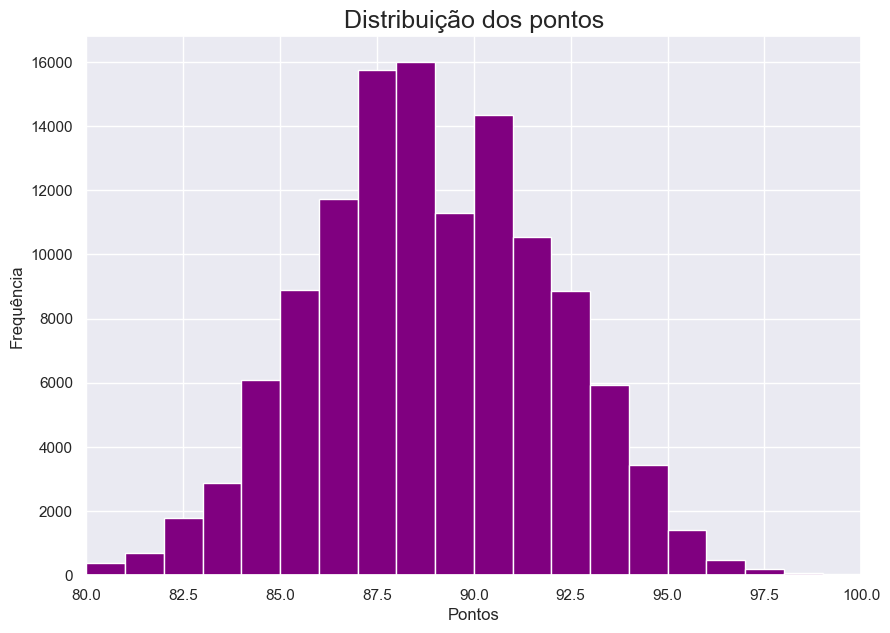

In [45]:
plt.figure(figsize=(10, 7))
plt.hist(data=df1, x='points',
         bins=np.arange (80, df1['points'].max()+1, 1),
         color = 'purple')
plt.xlim(80,100)
plt.title('Distribuição dos pontos', fontsize=18)
plt.xlabel('Pontos')
plt.ylabel('Frequência');

- Existe uma distribuição quase normal dos pontos variando a escala entre 80 e 100.
 Vamos ver quais países estão no Top 10 que mais produzem vinhos.

In [43]:
vinhos_top_10 = df1["country"].value_counts()[:10]
vinhos_top_10

US           54265
France       17776
Italy        16914
Spain         6573
Portugal      4875
Chile         4415
Argentina     3756
Austria       2799
Australia     2294
Germany       2120
Name: country, dtype: int64

 - Com base nesse filtro podemos gerar um gráfico para comparar os países que mais tiveram vinhos avaliados:

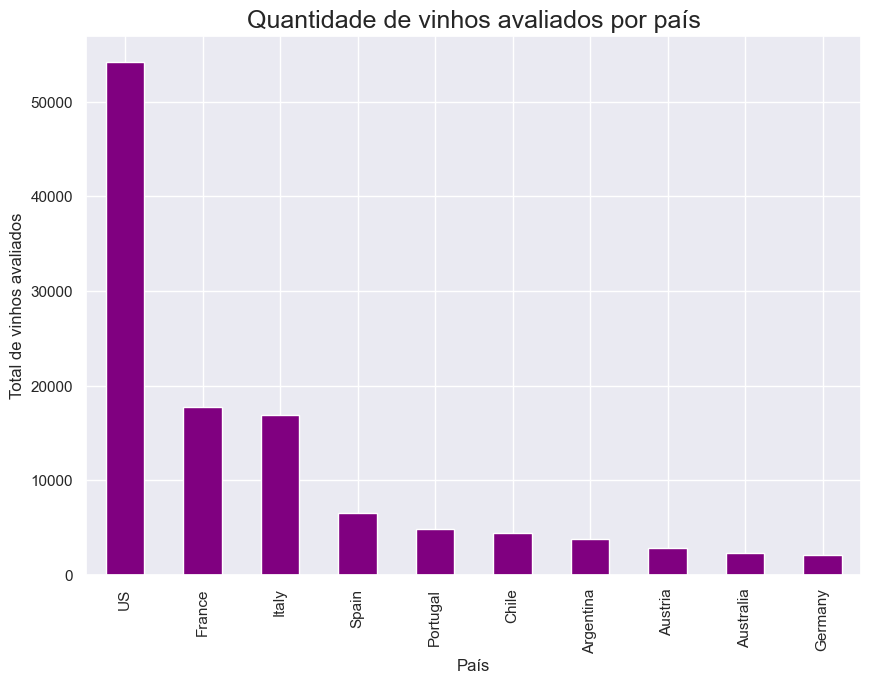

In [46]:
plt.figure(figsize=(10,7))
vinhos_top_10.plot(kind="bar", color="purple")
plt.title("Quantidade de vinhos avaliados por país", fontsize=18)
plt.xlabel("País")
plt.ylabel("Total de vinhos avaliados");

- Com base nessa ordenação do gráfico acima, vamos investigar quantos países produzem vinho de melhor qualidade de acordo com as classificações.

In [57]:
melhor_qualidade = df1.groupby("country").agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(by="points", ascending=False)[:10]
melhor_qualidade.style.background_gradient(cmap='Purples',high=0.5, subset=["points"])

,Unnamed: 0,points,price
country,,,
England,73313.072464,91.550725,51.681159
India,68964.000000,90.222222,13.333333
Austria,65569.563773,90.190782,30.762772
Germany,65638.475943,89.836321,42.257547
Canada,70864.653543,89.377953,35.712598
Hungary,71663.606897,89.165517,40.648276
China,109989.000000,89.000000,18.000000
France,64847.977779,88.734867,41.139120
Luxembourg,56476.000000,88.666667,23.333333


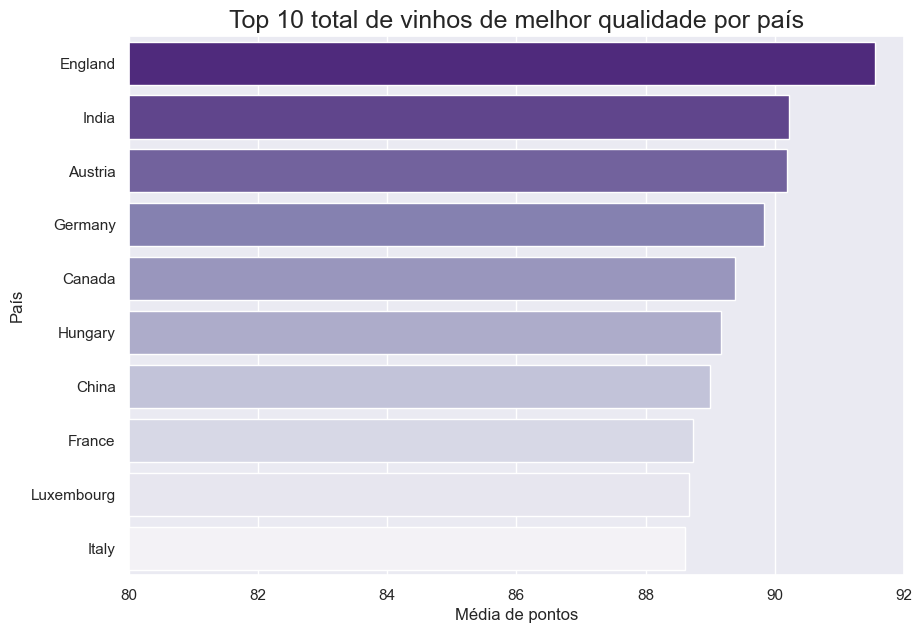

In [66]:
y =melhor_qualidade.index.to_series()
x = melhor_qualidade["points"]

plt.figure(figsize=(10,7))
plt.xlim(80, 92)
sns.barplot(x=x, y=y, palette="Purples_r")
plt.title("Top 10 total de vinhos de melhor qualidade por país", fontsize=18)
plt.xlabel("Média de pontos")
plt.ylabel("País");

 - Ao verificar a média de pontos, podemos perceber que o país com melhor avaliação (que produziu o vinho de melhor qualidade) foi a Inglaterra. Isso ocorre, porque talvez haja menos vinhos da Inglaterra no nosso DataFrame e eles tenham uma pontuação alta, representando um aumento na média. Vale a pena investigarmos isso mais a fundo, podemos olhar para os países com pontuação máxima acima de 95 (vinhos excelentes).

In [100]:
# número de vinhos por país com classificações mais altas 95-100
high_scores = df1[df1["points"]>=95]
high_scores["country"].value_counts()

US              991
France          509
Italy           326
Austria         103
Portugal         96
Germany          62
Spain            51
Australia        47
Argentina        11
Hungary           5
England           3
South Africa      3
Chile             2
New Zealand       2
Name: country, dtype: int64

- Os países com classificação mais alta 95-100 pontos, diferem do nosso gráfico de pontuações mais altas com base nas médias. Podemos criar um gráfico do tipo boxplot que nos permitirá ver o máximo, o mínimo e a média das pontuações por cada país. Como essa base de dados apresenta mais vinhos avaliados dos EUA, é provável que haja uma grande variedade de vinhos do país, enquanto a Inglaterra, que teve a melhor pontuação média, apresenta menos vinhos na base de dados, o que resulta em uma comparação injusta.

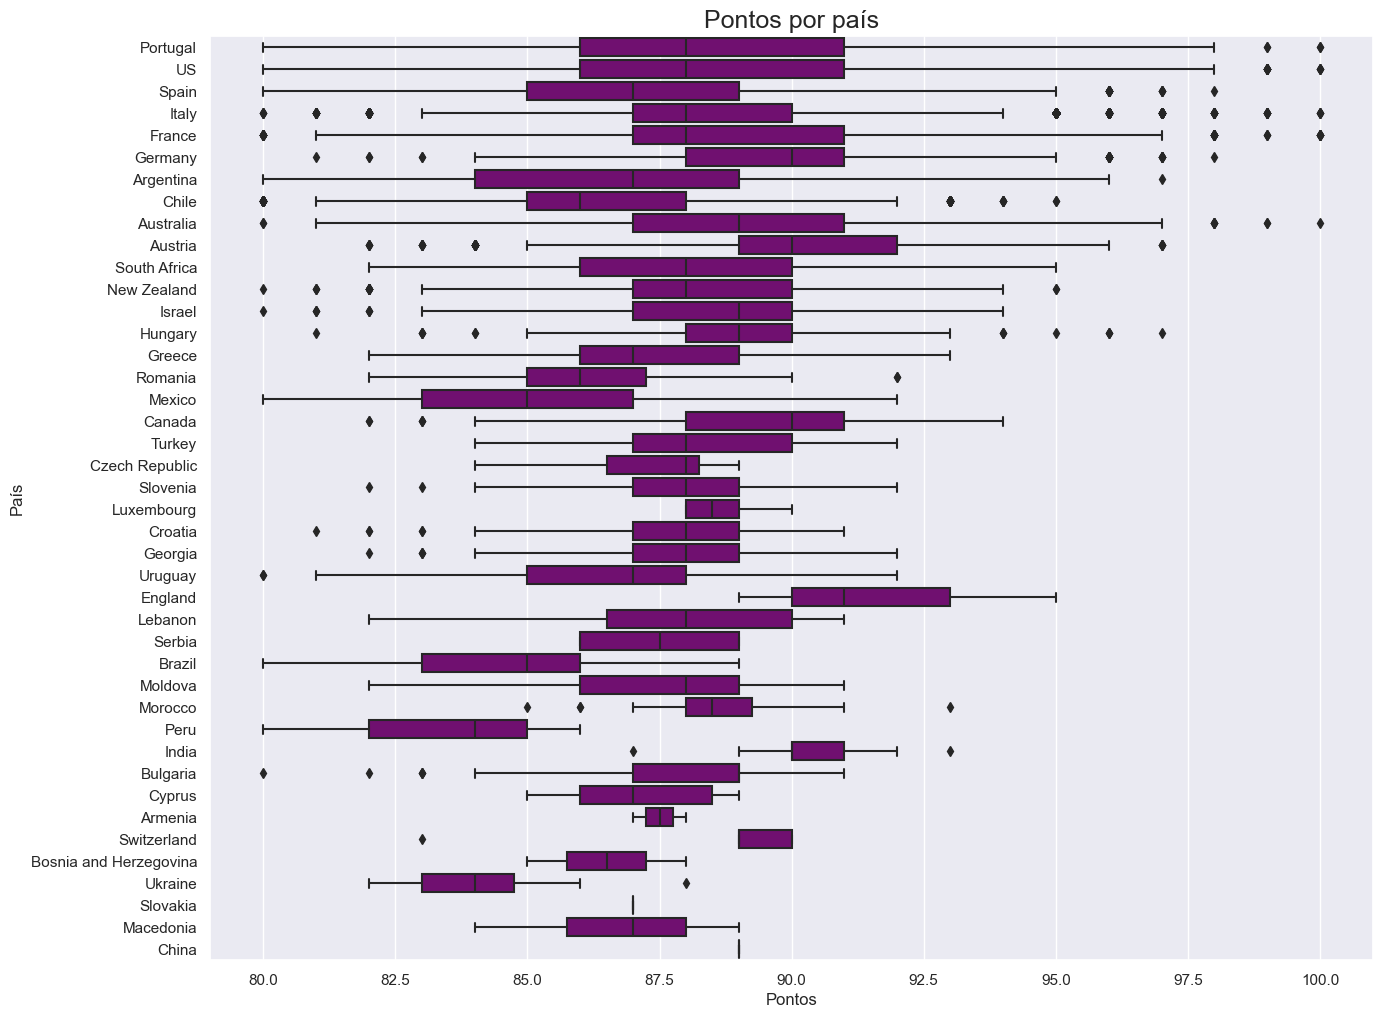

In [91]:
plt.figure(figsize=(15, 12))
sns.boxplot(data=df1, x='points', y='country', color = 'Purple')
plt.title('Pontos por país', fontsize = 18)
plt.xlabel('Pontos')
plt.ylabel('País');

 - Embora os vinhos da Inglaterra tenham os pontos mais altos em média, os vinhos de Portugal, EUA, Itália, França e Austrália, receberam uma pontuação perfeita de 100. Há mais vinhos desses países na base de dados, portanto eles receberam uma gama maior de pontos.

Ok, agora que vimos as distribuições de pontos por cada país, vamos investigar o preço do vinho nos países:

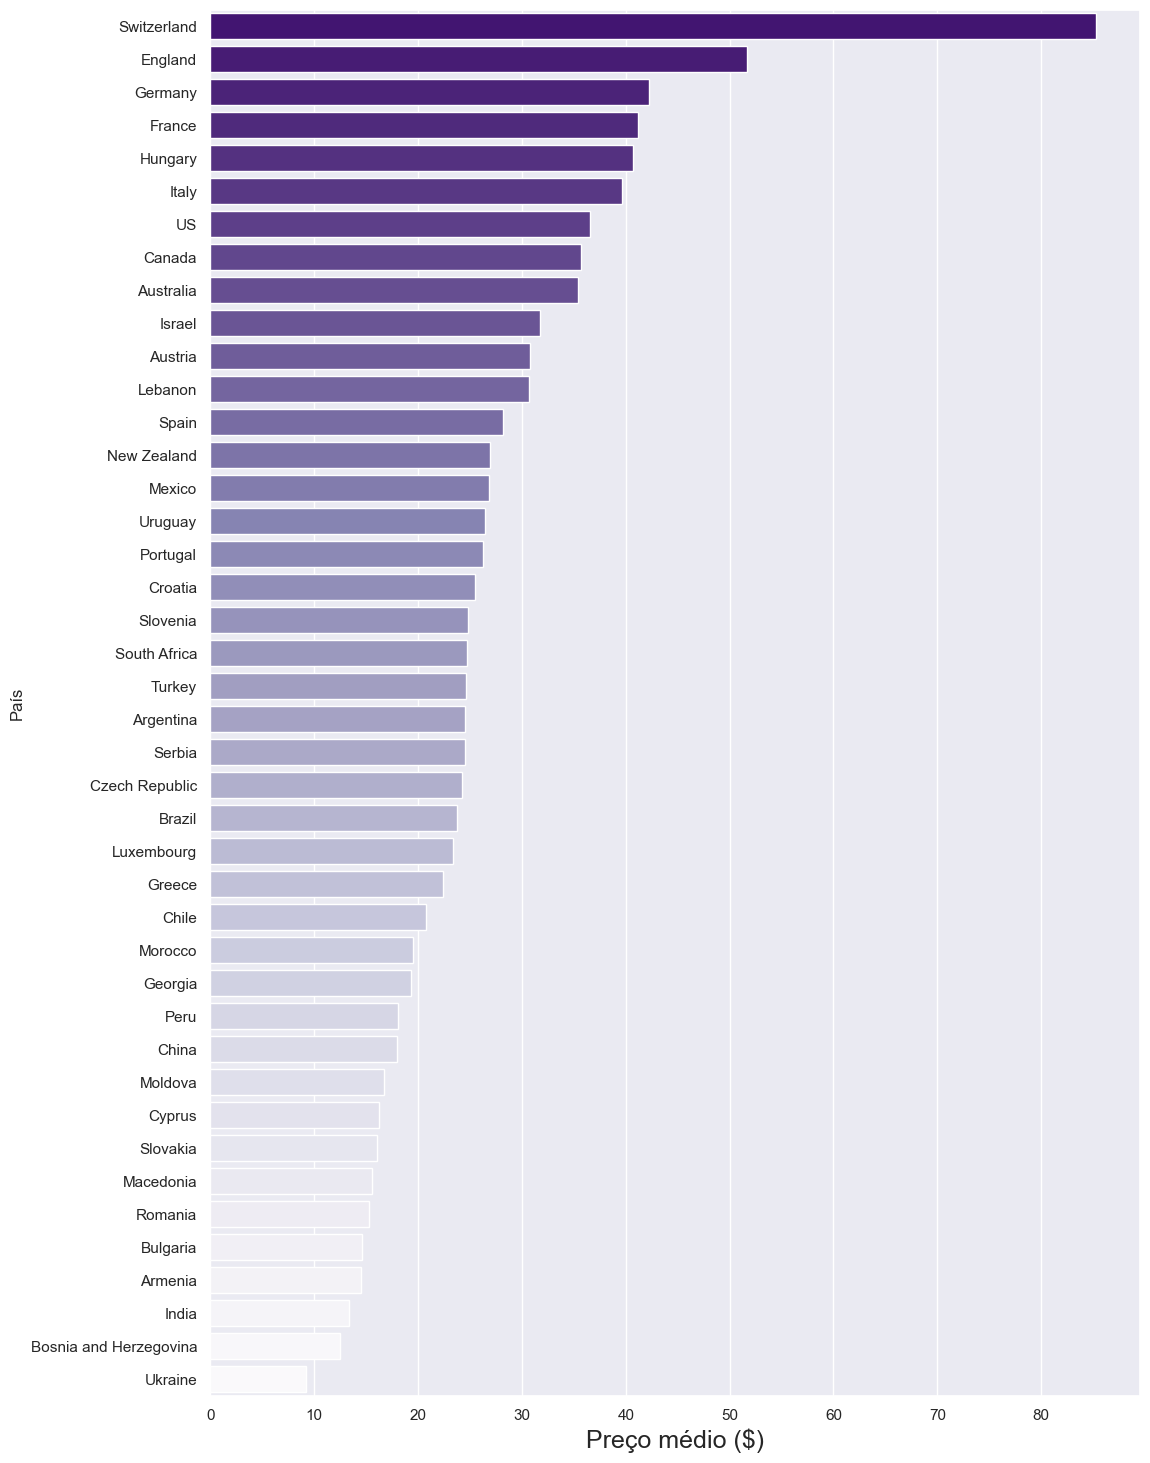

In [73]:
preco_medio = df1.groupby("country").agg("mean")
preco_medio = preco_medio.sort_values(by="price", ascending= False)

y= preco_medio.index.to_series()
x=preco_medio["price"]

plt.figure(figsize=(12,18))
sns.barplot(x=x, y=y, palette= "Purples_r")
plt.xlabel("Preço médio da garrafa de vinho por país", fontsize = 18)
plt.xlabel("Preço médio ($)")
plt.ylabel("País");


                                      
                      

 - A Suíça, produz o vinho mais caro, com o preço médio da garrafa de mais de 80 dólare o vinho da Ucrânia, está no outro extremo, com o preço médio mais baixo, 10 dólares a garrafa. Vamos investigar se o preço está relacionado a qualidade do vinho. A utilização de histogramas para essa tarefa parece um bom plano:

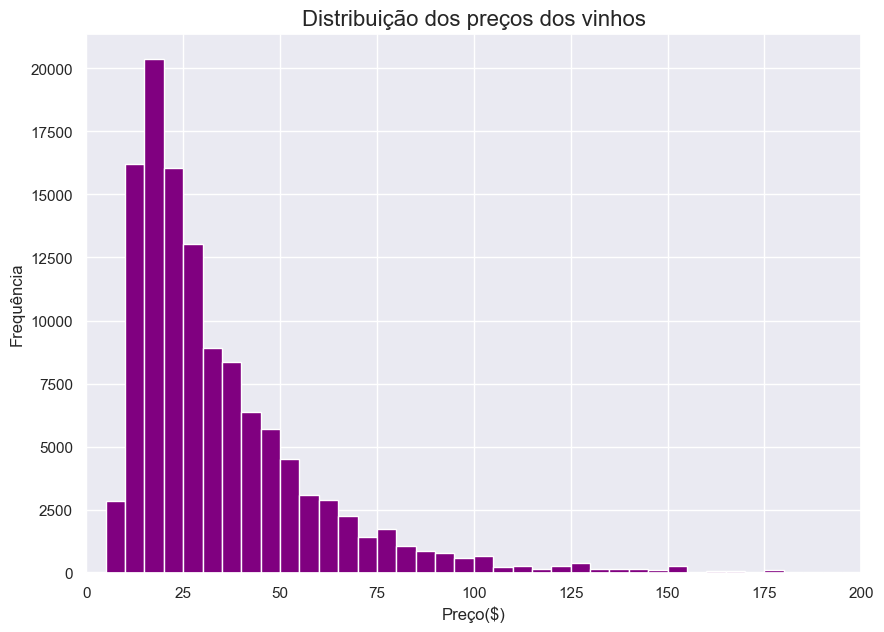

In [74]:
plt.figure(figsize=(10, 7))
bins = np.arange (0, df1["price"].max()+5, 5)
plt.hist(data=df1, x='price', bins=bins, color = 'Purple')
plt.xlim(0,200)
plt.title('Distribuição dos preços dos vinhos', fontsize=16)
plt.xlabel('Preço($)')
plt.ylabel('Frequência');
                        

 - Interessante, os dados de preço dos vinhos apresentam uma distorção grande para a direita. Nesse caso precisamos de uma transformação logarítmica nos dados.

In [76]:
df1["price"].describe()


count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [77]:
np.log10(df1["price"].describe())


count    5.082480
mean     1.548620
std      1.613114
min      0.602060
25%      1.230449
50%      1.397940
75%      1.623249
max      3.518514
Name: price, dtype: float64

Agora utilizando os dados com a transformação logarítmica para o nosso histograma:



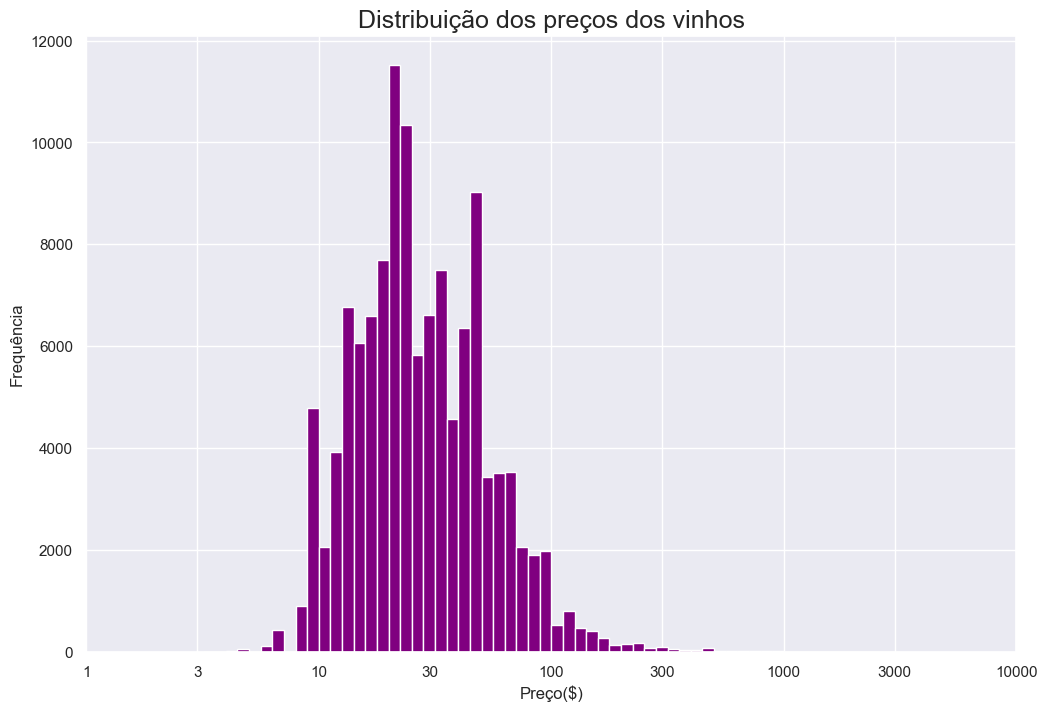

In [79]:
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=df1, x='price', bins=bins, color='Purple')
plt.title('Distribuição dos preços dos vinhos', fontsize=18)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Preço($)')
plt.ylabel('Frequência');

- Bem melhor! Agora é possível ver uma distribuição (quase normal). Existe um salto na região dos 10 dólares e um pico mais visível em pouco mais de 20 dólares. Depois temos outro pico acima de $50. Agora podemos plotar um gráfico do tipo scatter para visualizar se existe uma correlação entre a pontuação e o valor da garrafa.

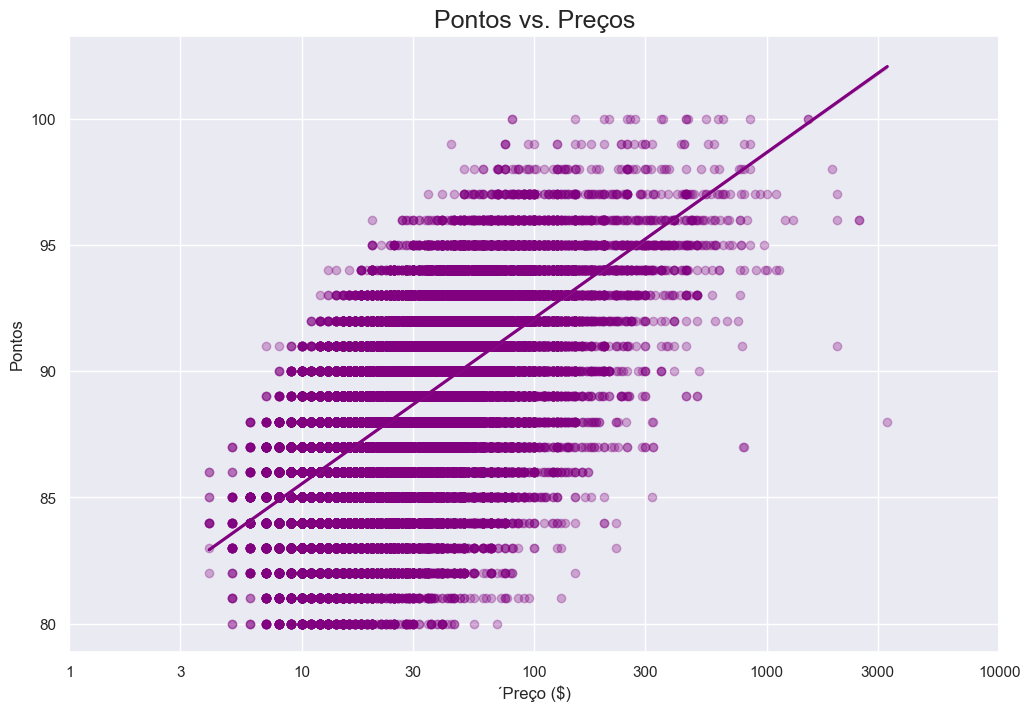

In [80]:
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.figure(figsize=(12, 8))
sns.regplot(x="price", y="points", data = df1, color="Purple", logx= True, scatter_kws= {"alpha": 0.3})
plt.title("Pontos vs. Preços", fontsize= 18)
plt.xscale("log")
plt.xticks(x, x)
plt.xlabel("´Preço ($)")
plt.ylabel("Pontos");

 - O gráfico nos mostra uma relação positiva entre as duas variáveis (pontuação e preços), ou seja, vinhos mais caros tendem a receber melhores avaliações. Também é possível observar dois pontos mais afastados, um na região dos 4 dólares e outro pouco depois de 3000 dólares. Vamos listar esses dois valores para descobrir quais vinhos são esses, buscando pelo valor máximo e mínimo:

In [85]:
df1[df1["price"] == df1["price"].min()][:1]

,country,description,points,price,province,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis


In [86]:
df1[df1["price"] == df1["price"].max()][:1]

,country,description,points,price,province,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


 Temos um vinho Espanhol com 85 pontos de classificação que custa 4 dólares a garrafa e um vinho Francês de 88 pontos que custa 3.300 dólares.

Agora vamos investigar se certas variedades de vinhos (tipos de uva) são de melhor qualidade. Para isso podemos filtrar uma amostra de 20 melhores vinhos e ver como eles pontuam.

In [87]:
df1["variety"].value_counts()[:20]


Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Zinfandel                    2708
Malbec                       2593
Sangiovese                   2377
Nebbiolo                     2331
Portuguese Red               2196
White Blend                  2167
Sparkling Blend              2027
Tempranillo                  1788
Rhône-style Red Blend        1404
Pinot Gris                   1388
Name: variety, dtype: int64

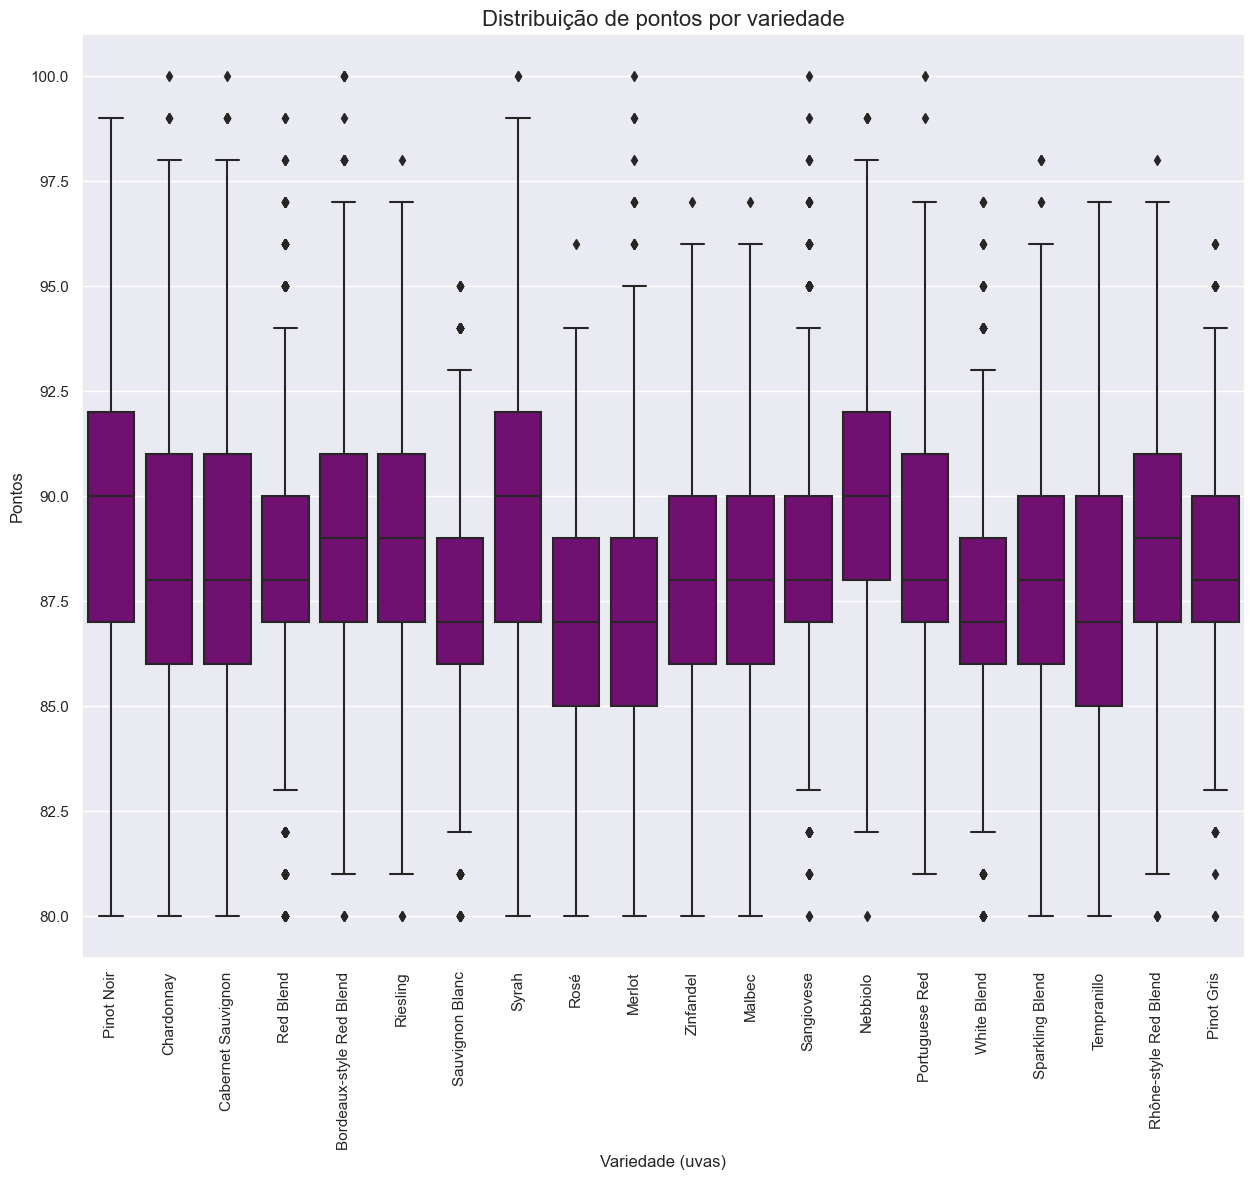

In [90]:
plt.figure(figsize=(15, 12))
sns.boxplot(data=df1,
            x='variety',
            y='points',
            color="Purple",
            order=df1["variety"].value_counts().iloc[:20].index)

plt.title('Distribuição de pontos por variedade', fontsize = 16)
plt.xlabel('Variedade (uvas)')
plt.ylabel('Pontos')
plt.xticks(rotation=90);

# Qual o melhor vinho em cada faixa de preço?

- Listando o **Top 20 melhores** vinhos (com melhor classificação) na base de dados, vemos que a variedade Pinot Noir tende a ter o melhor desempenho, com a pontuação média mais alta.

- Já sabemos que a qualidade está fortemente relacionada ao preço, mas nem todos os clientes podem gastar 3000 dólares em uma garrafa de vinho toda semana. Nossa tarefa agora é descobrir o melhor custo-benefício em algumas faixas de preço:
    - Até 15 dólares
    - Entre 15 e 30 dólares
    - Entre 30 e 50 dólares
    - Acima de 50 dólares



In [92]:
# top 10 custando até $15
under_15 = df1.drop(["description", "province", "winery"], axis=1)
under_15 = under_15[under_15["price"] <= 15]
under_15 = under_15.sort_values(by="points", ascending=False)[:10]
under_15.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
19136,Spain,94,14.000000,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry
23974,Portugal,94,13.000000,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red
12255,South Africa,93,15.000000,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon
129572,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
37882,Australia,93,15.000000,Marquis Philips 2000 Sarah's Blend Red (South Eastern Australia),Red Blend
74042,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
52776,US,93,14.000000,Uvaggio 2009 Vermentino (Lodi),Vermentino
43193,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier
9609,France,93,13.000000,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot
59823,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier


- Com base nos dados, uma boa escolha aqui seria um vinho Português de 94 pontos por $13, Quinta dos Murças 2011 Assobio Red (Douro).

In [93]:
# top 10 com valor entre $15 e $30
between_15_and_30 = df1.drop(["description", "province", "winery"], axis=1)
between_15_and_30 = between_15_and_30.query("price > 15 and price <= 30")
between_15_and_30 = between_15_and_30.sort_values(by="points", ascending=False)[:10]
between_15_and_30.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
54311,Austria,96,28.000000,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal),Riesling
81902,US,96,30.000000,Efeste 2009 Lola Chardonnay (Columbia Valley (WA)),Chardonnay
45992,France,96,28.000000,Château Filhot 2014 Sauternes,Bordeaux-style White Blend
102489,US,96,27.000000,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay
119658,Spain,96,30.000000,Alvear NV Solera 1927 Pedro Ximénez (Montilla-Moriles),Pedro Ximénez
101580,US,96,20.000000,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah
9901,France,96,29.000000,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling
40309,Italy,96,27.000000,Isole e Olena 2010 Chianti Classico,Red Blend
109845,US,96,30.000000,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir
54253,US,96,27.000000,Donkey & Goat 2012 Grenache Noir Grenache (El Dorado),Grenache


 - Já nessa lista, se o cliente estiver disposto a gastar um pouco mais. A melhor opção seria um vinho dos EUA de 96 pontos por $20.

In [94]:
# top 10 com valor entre $30 e $50
between_30_and_50 = df1.drop(["description", "province", "winery"], axis=1)
between_30_and_50 = between_30_and_50.query("price > 30 and price <= 50")
between_30_and_50 = between_30_and_50.sort_values(by="points", ascending=False)[:10]
between_30_and_50.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
118059,US,99,44.000000,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay
1560,US,98,50.000000,Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend
47432,US,97,50.000000,Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley),Chardonnay
4504,US,97,50.000000,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley),Zinfandel
114981,US,97,35.000000,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah
45986,France,97,45.000000,Château Coutet 2014 Barsac,Bordeaux-style White Blend
125831,US,97,50.000000,Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley),Chardonnay
16524,Portugal,97,40.000000,Taylor Fladgate NV 325 Anniversary (Port),Port
128268,US,97,50.000000,Trefethen 2005 Estate Cabernet Sauvignon (Oak Knoll District),Cabernet Sauvignon
89730,France,97,50.000000,René Muré 2015 Clos Saint Landelin Vorbourg Grand Cru Riesling (Alsace),Riesling


 - Se a preferência do cliente for da variedade Chardonnay, nesse filtro é possível levar um vinho de 99 pontos por $44.

In [95]:
# top 10 com valor acima de $50
above_50 = df1.drop(["description", "province", "winery"], axis=1)
above_50 = above_50.query("price > 50")
above_50 = above_50.sort_values(by="points", ascending=False)[:10]
above_50.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

,country,points,price,title,variety
113929,US,100,80.000000,Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah
111755,France,100,1500.000000,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend
89728,France,100,250.000000,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend
123545,US,100,80.000000,Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah
118058,US,100,450.000000,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
89729,France,100,617.000000,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay
45781,Italy,100,550.000000,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese
111753,France,100,1500.000000,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend
111754,Italy,100,270.000000,Casanova di Neri 2007 Cerretalto (Brunello di Montalcino),Sangiovese Grosso
42197,Portugal,100,450.000000,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red


 - Por $80 é possível experimentar o sabor de um vinho de 100 pontos, com duas opções: Charles Smith 2006 Royal City Syrah e Cayuse 2008 Bionic Frog Syrah, ambos dos EUA.

# Conclusão

Agora podemos finalmente responder as perguntas que recebemos no começo deste projeto.

- **De onde vem o melhor vinho ?**

Resposta: A Inglaterra é quem em média produz vinhos soberbos. Mas se você quiser uma garrafa com pontuação perfeita de 100 deve observar os vinhos de outros países: França, Itália, EUA, Portugal ou Austrália.

- **O preço do vinho está relacionado com a qualidade ?**

Resposta: É nítido que o preço do vinho está relacionado com a qualidade. Mas se você souber onde procurar, pode encontrar um vinho de 4 doláres que possui apenas 3 pontos abaixo de uma garrafa que custa 3.300 dólares.

- **Certas variedades de uvas são de maior qualidade ?**

Resposta: Todas as variedades estão na mesma situação (niveladas). A maior aposta com base nos dados é Pinot Noir.

- **Qual é o melhor vinho em cada faixa de preço ?**

Resposta: Encontramos um vinho perfeito para cada orçamento. Com alguns destaques.

- **Que palavras são mais utilizadas para descrever um vinho ?**

Resposta: Como pudemos ver na nuvem de palavras, certos termos aparecem uma vez ou outra nas descrições, termos como finish e palate aparecem em boa parte das avaliações.